# **Name: OWAIS C H**

# **Prediction Using Supervised ML**

In this task a predictive model based on linear regression is built for prediciting the score of students based on number of hours of study

In [1]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 64.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files 
import pandas as pd
uploaded=files.upload()

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

df=pd.read_csv(io.BytesIO(uploaded['student_scores.csv']))

Saving student_scores.csv to student_scores (1).csv


In [8]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Scatter plot showing the hours of study and scores obtained by each student**

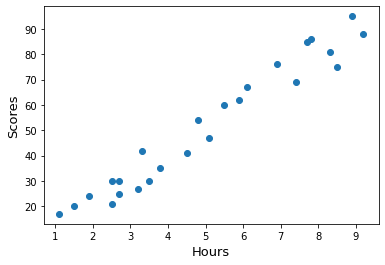

In [9]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours',fontsize=13)
plt.ylabel('Scores',fontsize=13)
plt.show()

**Splitting the data and buliding a predictive model**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']], df['Scores'],test_size=0.2, random_state=0) 
model=LinearRegression()  
model.fit(x_train,y_train)

LinearRegression()

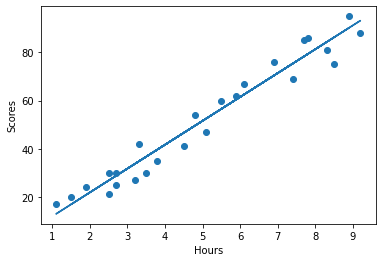

In [18]:
X=df['Hours'];Y=df['Scores']

plt.plot(X,model.coef_*X+model.intercept_)
plt.scatter(X,Y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Predicting the scores for the test set and comparing with actual score**

In [19]:
predicted=pd.DataFrame({'Hours':[x_test.iloc[i][0] for i in range(x_test.shape[0])],'Predicted Score':model.predict(x_test),'Actual Score':[y_test.iloc[i] for i in range(y_test.shape[0])]})
predicted

,Hours,Predicted Score,Actual Score
0,1.5,16.884145,20
1,3.2,33.732261,27
2,7.4,75.357018,69
3,2.5,26.794801,30
4,5.9,60.491033,62


**Plot showing the comparison of predicted score and actual score**

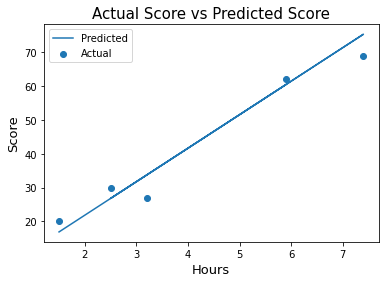

In [33]:
plt.plot(predicted['Hours'],predicted['Predicted Score'])
plt.scatter(predicted['Hours'],predicted['Actual Score'])
plt.legend(['Predicted','Actual'])
plt.title('Actual Score vs Predicted Score', size=15)
plt.xlabel('Hours', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.show()

**Evaluation of the model**

In [38]:
 print('mean absolute error:',metrics.mean_absolute_error(predicted['Predicted Score'], predicted['Actual Score'])) 

mean absolute error: 4.183859899002982


**Predicted score if a student studies for 9.25 hrs/ day?**

In [39]:
predicted_score = model.predict([[hours]])
print("Predicted Score for 9.25 hrs/day=",predicted_score[0])

Predicted Score for 9.25 hrs/day= 93.69173248737539
